# Lead Score - Case Study

### Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

There are a lot of leads generated in the initial stage but only a few of them gets converted as paying customers. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

X Education wants help in selecting the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires us to build a model wherein we need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

### Goals of the Case Study

- Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

- There are some more problems presented by the company which our model should be able to adjust to if the company's requirement changes in the future so we will need to handle these as well.


### Solution Approach steps

1. Data Read and Understanding
2. Data Cleaning and Preparation
3. Model Building
4. Model Evaluation
5. Making Predictions on the Test Set

In [1]:
# importing required libraries

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Data Read and Understanding

In [2]:
# Loading the data

lead_df = pd.read_csv('Leads.csv')

In [3]:
# cheching top 5 rows
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
# check the data shape
lead_df.shape

(9240, 37)

In [5]:
# inspecting the data info
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
# inspect the numeric colums
lead_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### 2. Data Cleaning and Preparation

In [7]:
# check for null values
lead_df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [8]:
# capturing the application missing values to do further analysis
lead_values_missing = lead_df.isnull().mean()*100
lead_values_missing

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [9]:
# filtering only columns which have missing values more than 0
lead_values_missing = lead_values_missing[lead_values_missing > 0]
lead_values_missing

Lead Source                                       0.389610
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Tags                                             36.287879
Lead Quality                                     51.590909
Lead Profile                                     29.318182
City                                             15.367965
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Index                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Score                       45.6493

In [10]:
# Identifying the columns with missing values >30%
lead_values_missing_30 = lead_values_missing[lead_values_missing>30]
lead_values_missing_30

Tags                           36.287879
Lead Quality                   51.590909
Asymmetrique Activity Index    45.649351
Asymmetrique Profile Index     45.649351
Asymmetrique Activity Score    45.649351
Asymmetrique Profile Score     45.649351
dtype: float64

### As the above columns have missing values greater than 30%, we can drop them

In [11]:
#fetch the column names to be dropped
lead_values_missing_30.index

Index(['Tags', 'Lead Quality', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score'],
      dtype='object')

In [12]:
columns_to_drop = lead_values_missing_30.index

In [13]:
# Drop the columns with more than 30% missing values
lead_df = lead_df.drop(columns=columns_to_drop)

In [14]:
# revalidate the shape of application dataframe post drop
lead_df.shape

(9240, 31)

In [15]:
#Analyse the missing values again in the cleaned dataframe
lead_df.isnull().mean()*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

#### As we can see above, columns below still have huge number of null values > 15%

- Lead Profile
- Country
- City
- Specialization
- How did you hear about X Education
- What is your current occupation
- What matters most to you in choosing a course

In [16]:
# Converting all the values of the dataframe to lower case to avoid any in-consistencies
lead_df = lead_df.applymap(lambda s:s.lower() if type(s) == str else s)

In [17]:
# let us analyze the lead profile column
lead_df['Lead Profile'].astype('category').value_counts()

Lead Profile
select                         4146
potential lead                 1613
other leads                     487
student of someschool           241
lateral student                  24
dual specialization student      20
Name: count, dtype: int64

In [18]:
# let us check the percentage of each value
(lead_df['Lead Profile'].astype('category').value_counts() / len(lead_df)) * 100

Lead Profile
select                         44.870130
potential lead                 17.456710
other leads                     5.270563
student of someschool           2.608225
lateral student                 0.259740
dual specialization student     0.216450
Name: count, dtype: float64

#### As maximum values of 44.87% in Lead profile has value as Select, it is of not much use to us. So we can drop it.

In [19]:
# drop lead profile column
lead_df.drop(['Lead Profile'], axis = 1, inplace = True)

In [20]:
# let us analyze the What matters most to you in choosing a course column which has close to 30% null values
lead_df['What matters most to you in choosing a course'].value_counts()

What matters most to you in choosing a course
better career prospects      6528
flexibility & convenience       2
other                           1
Name: count, dtype: int64

As the above column is a good candidate for us in analyzing the issue, let us replace the running value with 'not provided'. if it comes up in the model, it will be of no use to us and then we can drop it later

In [21]:
lead_df['What matters most to you in choosing a course'] = lead_df['What matters most to you in choosing a course'].fillna('not provided')

In [22]:
# Re-analyse the missing values again in the cleaned dataframe
lead_df.isnull().mean()*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course     0.000000
Search                                            0.0000

In [23]:
# let us analyze What is your current occupation column
lead_df['What is your current occupation'].value_counts()

What is your current occupation
unemployed              5600
working professional     706
student                  210
other                     16
housewife                 10
businessman                8
Name: count, dtype: int64

Again the above column can be good candidate, so let us retain it and replace missing values with not provided

In [24]:
lead_df['What is your current occupation'] =lead_df['What is your current occupation'].fillna('not provided')

In [25]:
# Re-analyse the missing values again in the cleaned dataframe
lead_df.isnull().mean()*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                   0.000000
What matters most to you in choosing a course     0.000000
Search                                            0.0000

#### Similarly for Country and Specialization columns

In [26]:
lead_df['Country'] = lead_df['Country'].fillna('not provided')
lead_df['Specialization'] = lead_df['Specialization'].fillna('not provided') 

In [27]:
# Re-analyse the missing values again in the cleaned dataframe
lead_df.isnull().mean()*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                           0.000000
Specialization                                    0.000000
How did you hear about X Education               23.885281
What is your current occupation                   0.000000
What matters most to you in choosing a course     0.000000
Search                                            0.0000

In [28]:
# let us analyze How did you hear about X Education column
lead_df['How did you hear about X Education'].value_counts()

How did you hear about X Education
select                   5043
online search             808
word of mouth             348
student of someschool     310
other                     186
multiple sources          152
advertisements             70
social media               67
email                      26
sms                        23
Name: count, dtype: int64

#### Next column How did you hear about X Education has many missing values and value as 'select', so it is better to drop it as it might not be beneficial to us

In [29]:
lead_df.drop(['How did you hear about X Education'], axis = 1, inplace = True)

#### Next city column which have high null values can be dropped as it will not be of much use to us in modelling

In [30]:
lead_df.drop(['City'], axis = 1, inplace = True)

In [31]:
# Re-analyse the missing values again in the cleaned dataframe
lead_df.isnull().mean()*100

Prospect ID                                      0.000000
Lead Number                                      0.000000
Lead Origin                                      0.000000
Lead Source                                      0.389610
Do Not Email                                     0.000000
Do Not Call                                      0.000000
Converted                                        0.000000
TotalVisits                                      1.482684
Total Time Spent on Website                      0.000000
Page Views Per Visit                             1.482684
Last Activity                                    1.114719
Country                                          0.000000
Specialization                                   0.000000
What is your current occupation                  0.000000
What matters most to you in choosing a course    0.000000
Search                                           0.000000
Magazine                                         0.000000
Newspaper Arti

Now let us analyze the Country column

In [32]:
lead_df["Country"].value_counts()

Country
india                   6492
not provided            2461
united states             69
united arab emirates      53
singapore                 24
saudi arabia              21
united kingdom            15
australia                 13
qatar                     10
bahrain                    7
hong kong                  7
oman                       6
france                     6
unknown                    5
kuwait                     4
south africa               4
canada                     4
nigeria                    4
germany                    4
sweden                     3
philippines                2
uganda                     2
italy                      2
bangladesh                 2
netherlands                2
asia/pacific region        2
china                      2
belgium                    2
ghana                      2
kenya                      1
sri lanka                  1
tanzania                   1
malaysia                   1
liberia                    1
switze

In [33]:
# Function to categorize countries
def categorize_country(country):
    if country == "india":
        return "india"
    elif country == "not provided":
        return "not provided"
    else:
        return "outside india"

# Apply the function in a vectorized way using np.where
lead_df['Country'] = np.where(
    lead_df['Country'] == "india", "india",
    np.where(lead_df['Country'] == "not provided", "not provided", "outside india")
)

# Display value counts for the 'Country' column
print(lead_df['Country'].value_counts())

Country
india            6492
not provided     2461
outside india     287
Name: count, dtype: int64


#### Let us drop the small null rows from Lead Score, Total Visits, Last Activity and Page Views Per Visit

In [34]:
lead_df = lead_df[~pd.isnull(lead_df['Lead Source'])]

In [35]:
lead_df = lead_df[~pd.isnull(lead_df['TotalVisits'])]

In [36]:
lead_df = lead_df[~pd.isnull(lead_df['Page Views Per Visit'])]

In [37]:
lead_df = lead_df[~pd.isnull(lead_df['Last Activity'])]

In [38]:
# Re-analyse the missing values again in the cleaned dataframe
lead_df.isnull().mean()*100

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                            

#### Now all the columns available have no missing values

#### Check if there are columns with one unique value since it won't be beneficial our analysis

In [39]:
lead_df.nunique()

Prospect ID                                      9074
Lead Number                                      9074
Lead Origin                                         4
Lead Source                                        20
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1717
Page Views Per Visit                              114
Last Activity                                      17
Country                                             3
Specialization                                     20
What is your current occupation                     7
What matters most to you in choosing a course       4
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums          

In [40]:
# dropping unique valued columns
lead_df.drop(['Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque','Magazine'], axis = 1, inplace = True)

In [41]:
# re-analyzing the unique columns
lead_df.nunique()

Prospect ID                                      9074
Lead Number                                      9074
Lead Origin                                         4
Lead Source                                        20
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1717
Page Views Per Visit                              114
Last Activity                                      17
Country                                             3
Specialization                                     20
What is your current occupation                     7
What matters most to you in choosing a course       4
Search                                              2
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                   

In [42]:
lead_df.shape

(9074, 23)

In [43]:
# Removing Prospect ID and Lead Number columns since they are unique for everyone
lead_df.drop(['Prospect ID','Lead Number'], axis = 1, inplace = True)

In [44]:
# Re-analyse the missing values again in the cleaned dataframe
lead_df.isnull().mean()*100

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                            0.0
Through Recommendations                       

In [45]:
lead_df.shape

(9074, 21)

In [46]:
lead_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,api,olark chat,no,no,0,0.0,0,0.0,page visited on website,not provided,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified
1,api,organic search,no,no,0,5.0,674,2.5,email opened,india,...,unemployed,better career prospects,no,no,no,no,no,no,no,email opened
2,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,email opened,india,...,student,better career prospects,no,no,no,no,no,no,yes,email opened
3,landing page submission,direct traffic,no,no,0,1.0,305,1.0,unreachable,india,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified
4,landing page submission,google,no,no,1,2.0,1428,1.0,converted to lead,india,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified


### Univariate Analysis

In [47]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 non-n

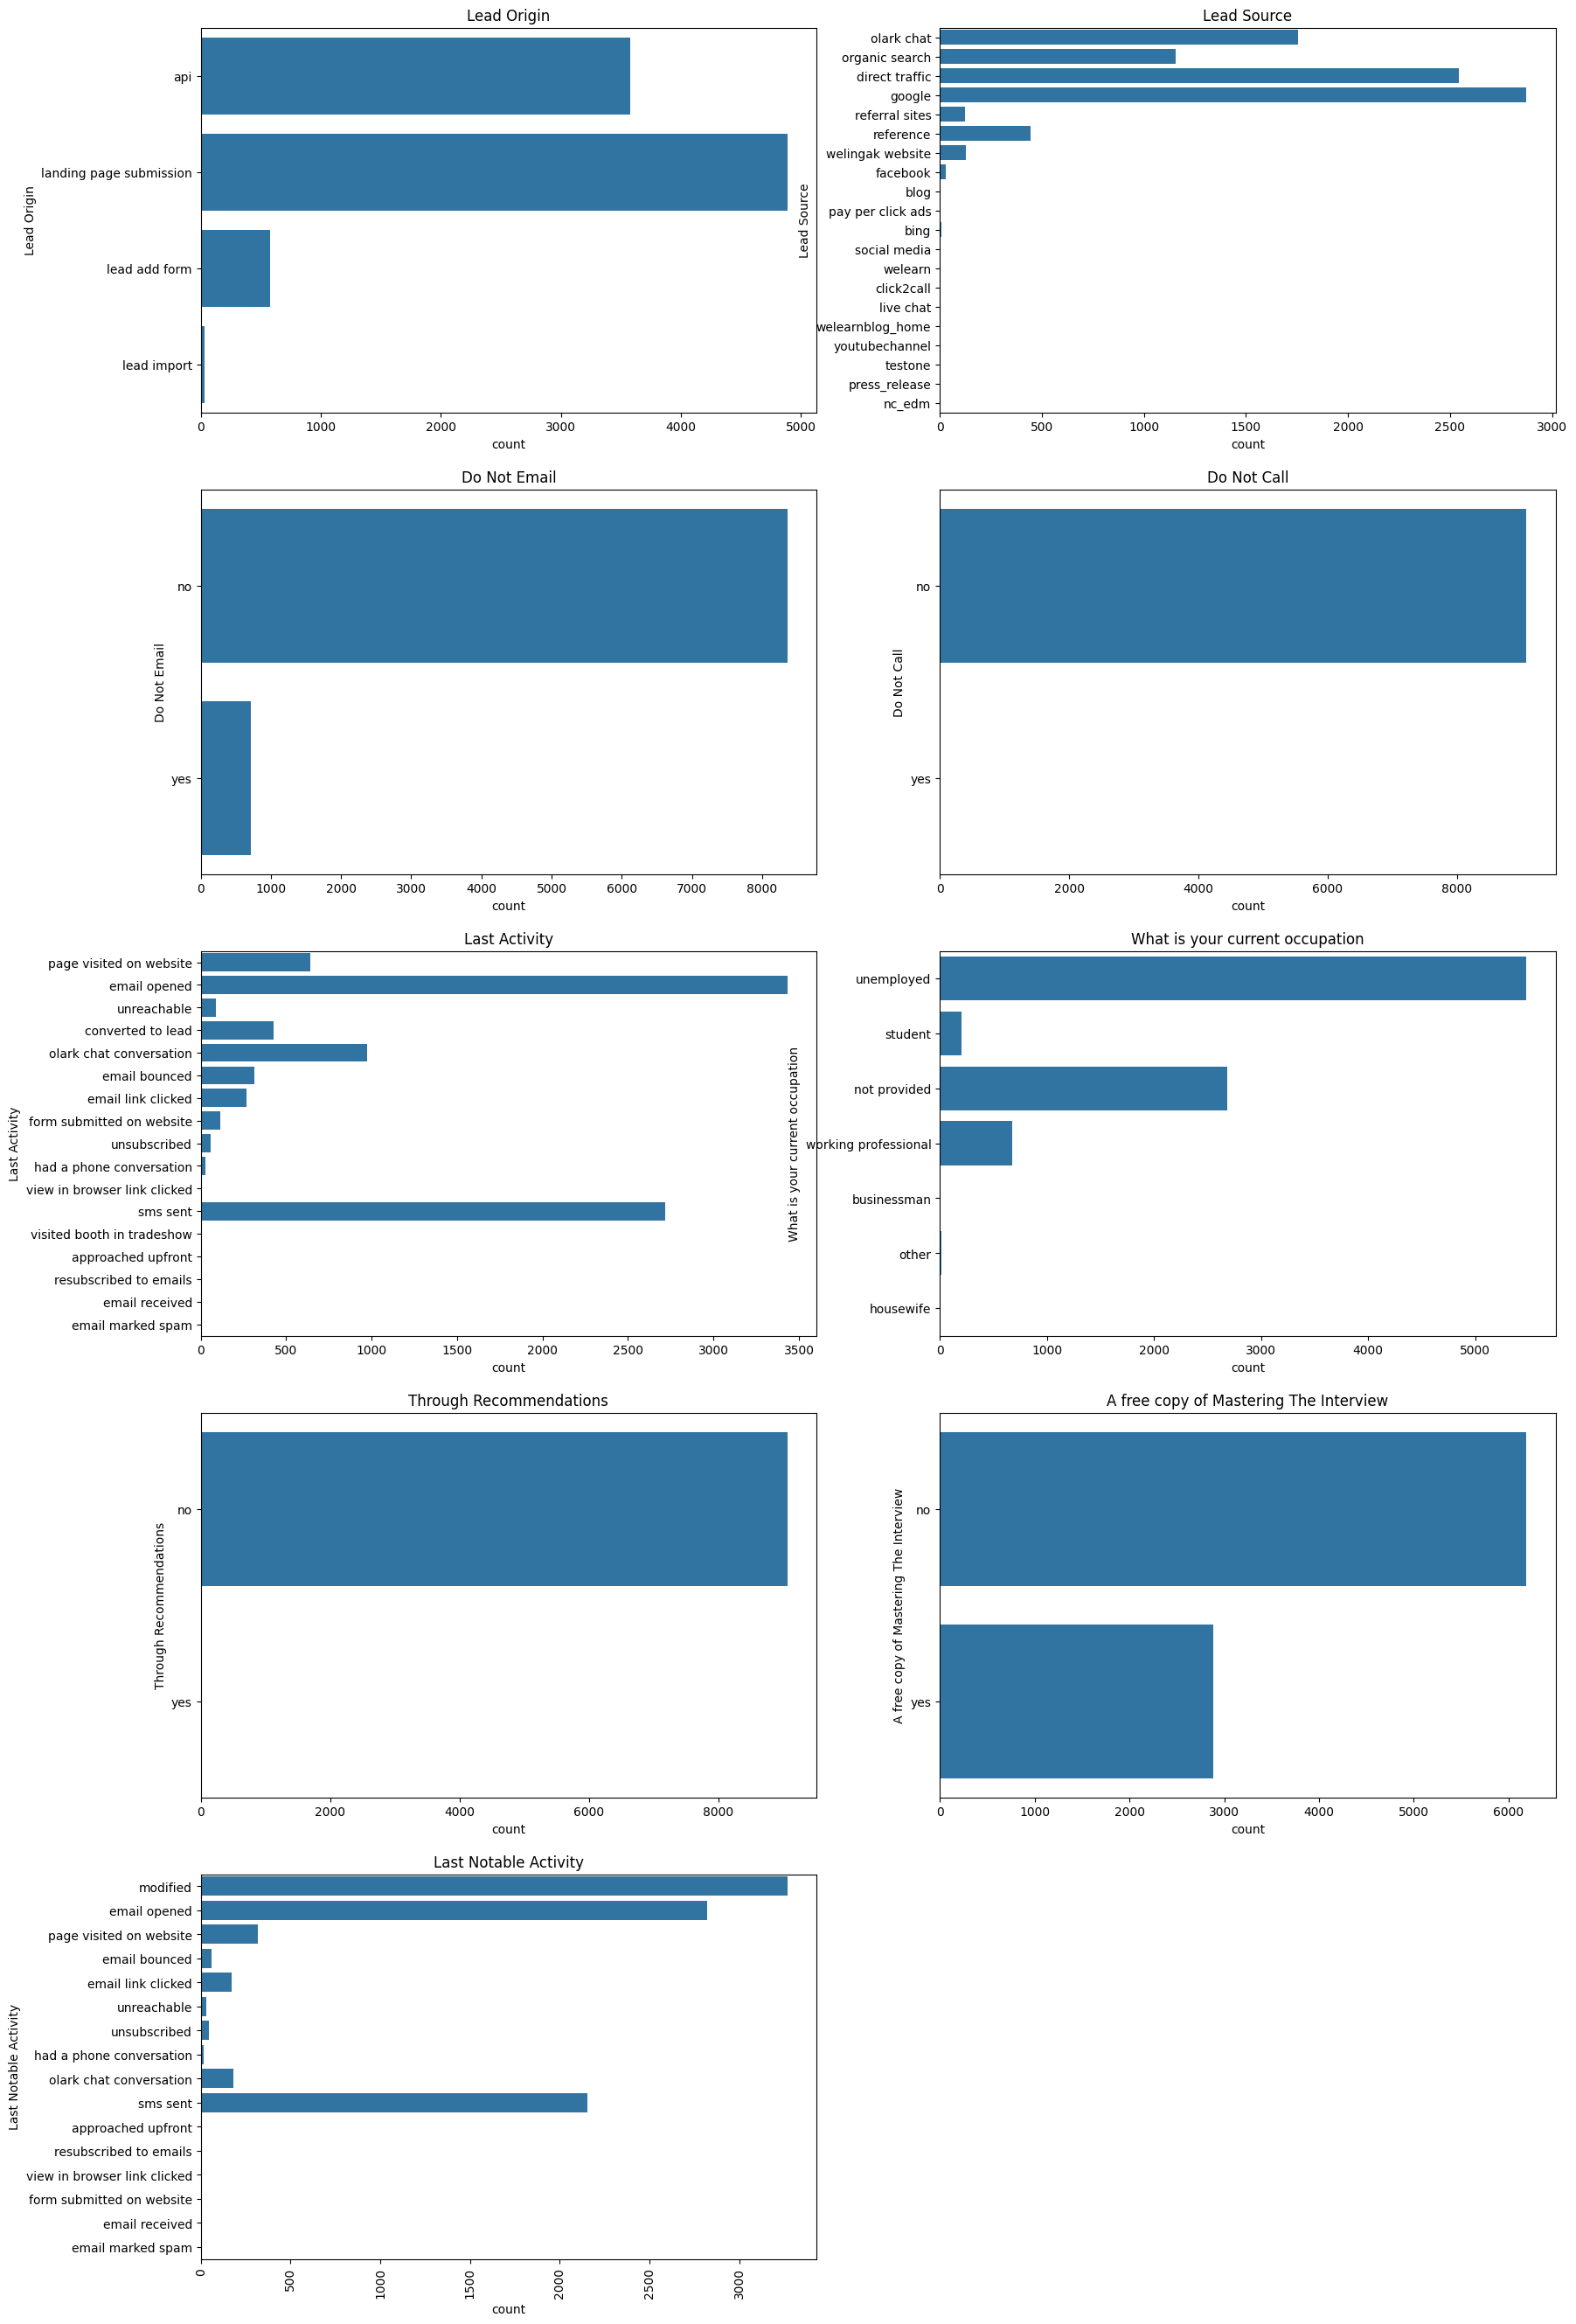

In [48]:
# Let us analyze the count plot for few columns

plt.figure(figsize = (20,40))

plt.subplot(6,2,1)
sns.countplot(lead_df['Lead Origin'])
plt.title('Lead Origin')

plt.subplot(6,2,2)
sns.countplot(lead_df['Lead Source'])
plt.title('Lead Source')

plt.subplot(6,2,3)
sns.countplot(lead_df['Do Not Email'])
plt.title('Do Not Email')

plt.subplot(6,2,4)
sns.countplot(lead_df['Do Not Call'])
plt.title('Do Not Call')

plt.subplot(6,2,5)
sns.countplot(lead_df['Last Activity'])
plt.title('Last Activity')

plt.subplot(6,2,6)
sns.countplot(lead_df['What is your current occupation'])
plt.title('What is your current occupation')

plt.subplot(6,2,7)
sns.countplot(lead_df['Through Recommendations'])
plt.title('Through Recommendations')

plt.subplot(6,2,8)
sns.countplot(lead_df['A free copy of Mastering The Interview'])
plt.title('A free copy of Mastering The Interview')

plt.subplot(6,2,9)
sns.countplot(lead_df['Last Notable Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')

plt.show()

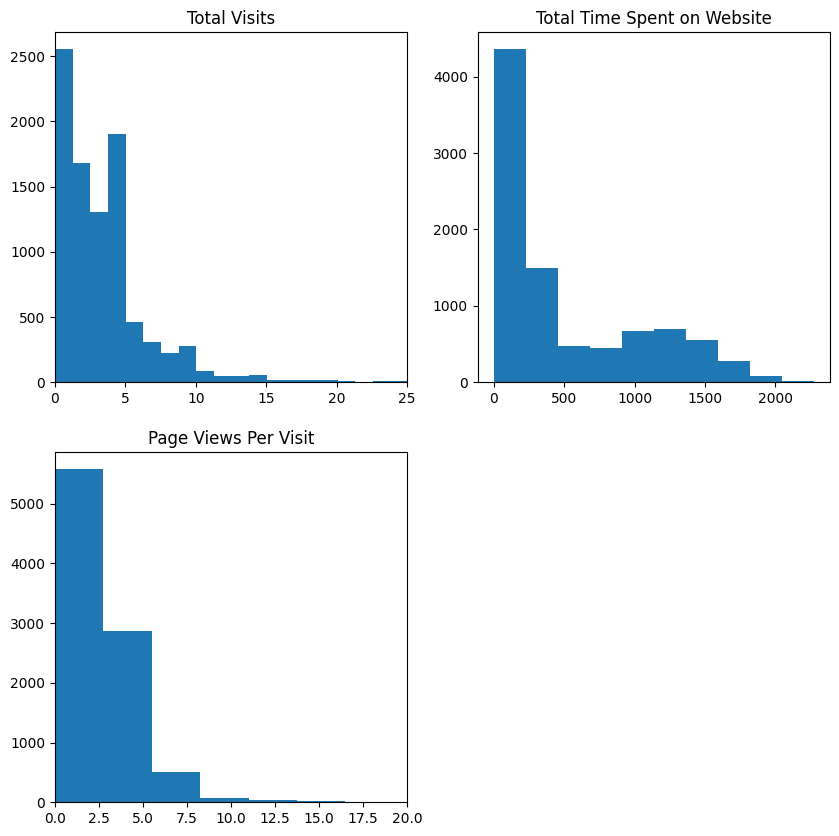

In [49]:
# Let us analyze the numerical values
plt.figure(figsize = (10,10))
plt.subplot(221)
plt.hist(lead_df['TotalVisits'], bins = 200)
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(222)
plt.hist(lead_df['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website')

plt.subplot(223)
plt.hist(lead_df['Page Views Per Visit'], bins = 20)
plt.title('Page Views Per Visit')
plt.xlim(0,20)
plt.show()

### Bivariate Analysis

#### Since, Converted is our target variable, comparing all categorical variable to Convereted

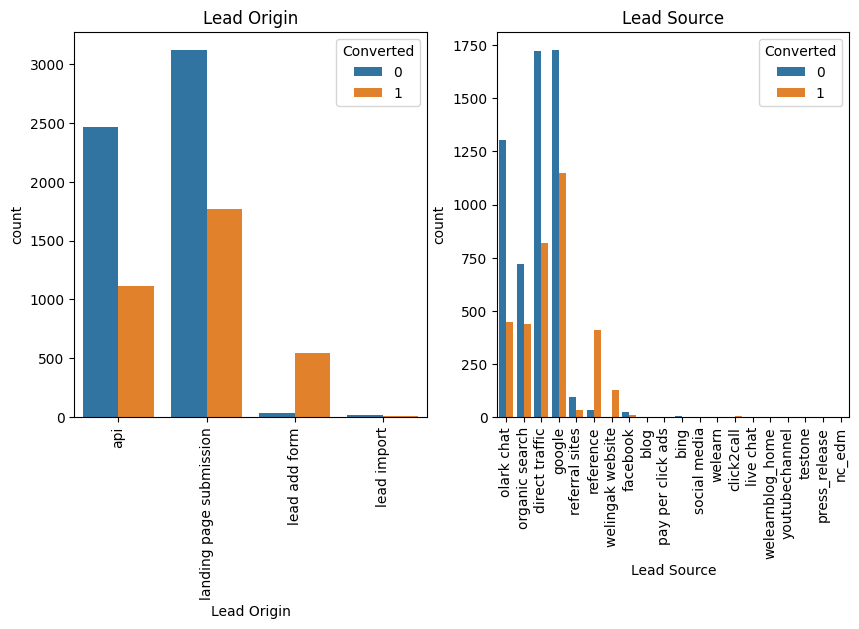

In [50]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Lead Origin', hue='Converted', data= lead_df).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')

plt.subplot(1,2,2)
sns.countplot(x='Lead Source', hue='Converted', data= lead_df).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

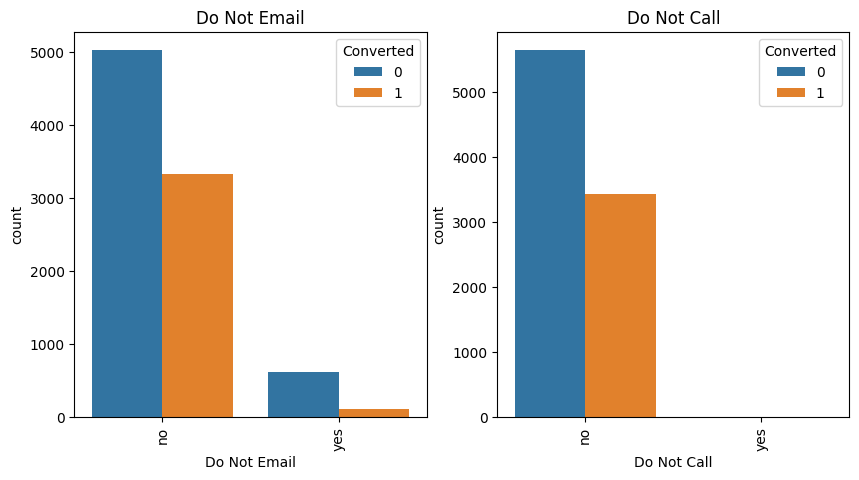

In [51]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Do Not Email', hue='Converted', data= lead_df).tick_params(axis='x', rotation = 90)
plt.title('Do Not Email')

plt.subplot(1,2,2)
sns.countplot(x='Do Not Call', hue='Converted', data= lead_df).tick_params(axis='x', rotation = 90)
plt.title('Do Not Call')
plt.show()

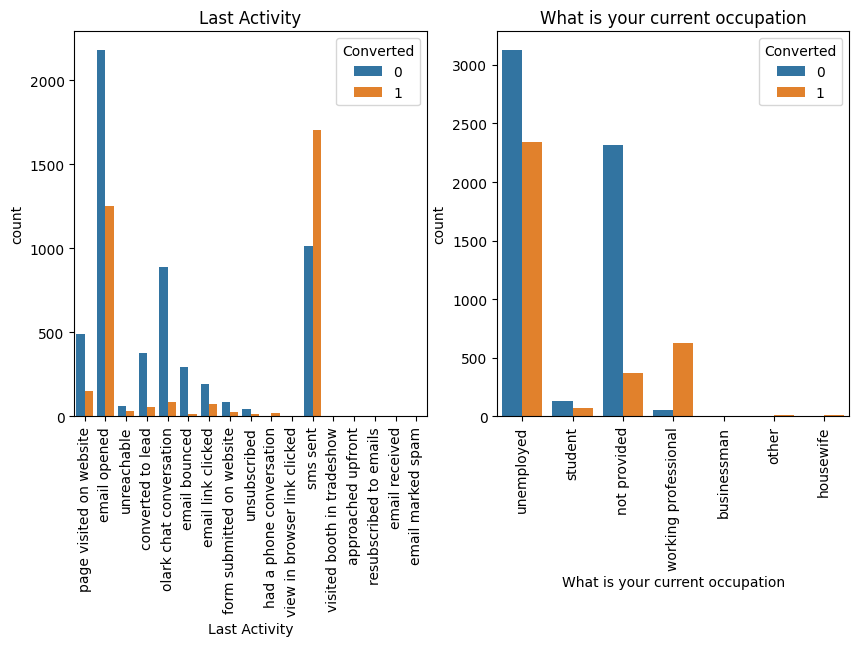

In [52]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Last Activity', hue='Converted', data= lead_df).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')

plt.subplot(1,2,2)
sns.countplot(x='What is your current occupation', hue='Converted', data= lead_df).tick_params(axis='x', rotation = 90)
plt.title('What is your current occupation')
plt.show()

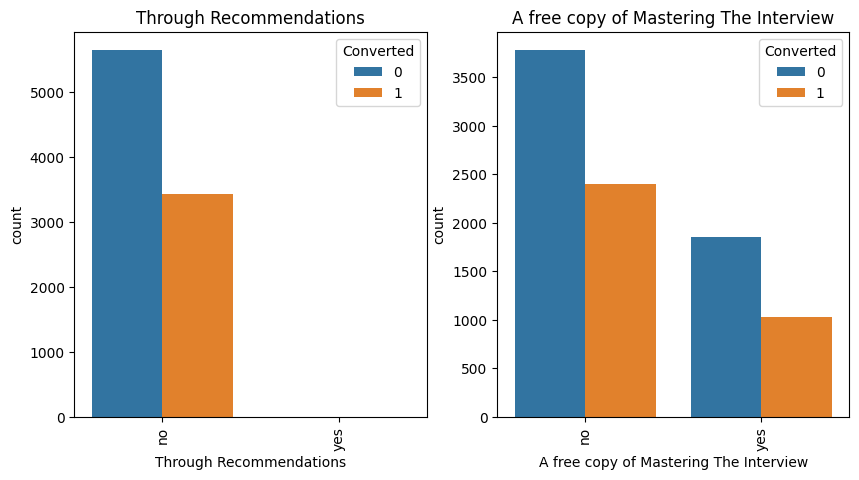

In [53]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Through Recommendations', hue='Converted', data= lead_df).tick_params(axis='x', rotation = 90)
plt.title('Through Recommendations')

plt.subplot(1,2,2)
sns.countplot(x='A free copy of Mastering The Interview', hue='Converted', data= lead_df).tick_params(axis='x', rotation = 90)
plt.title('A free copy of Mastering The Interview')
plt.show()

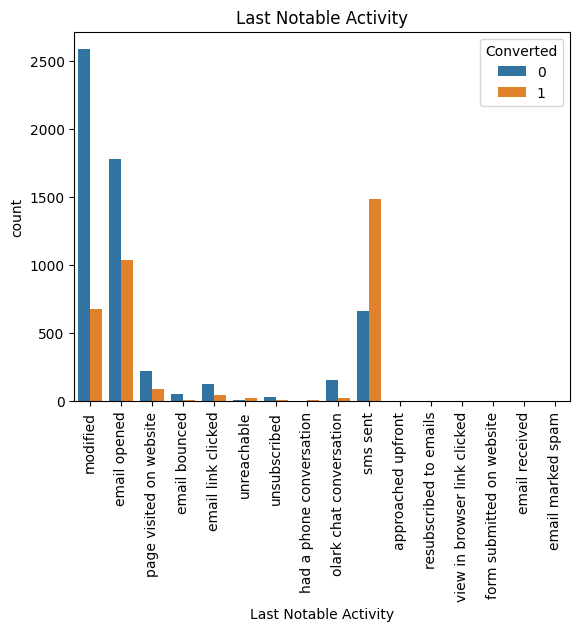

In [54]:
sns.countplot(x='Last Notable Activity', hue='Converted', data= lead_df).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')
plt.show()

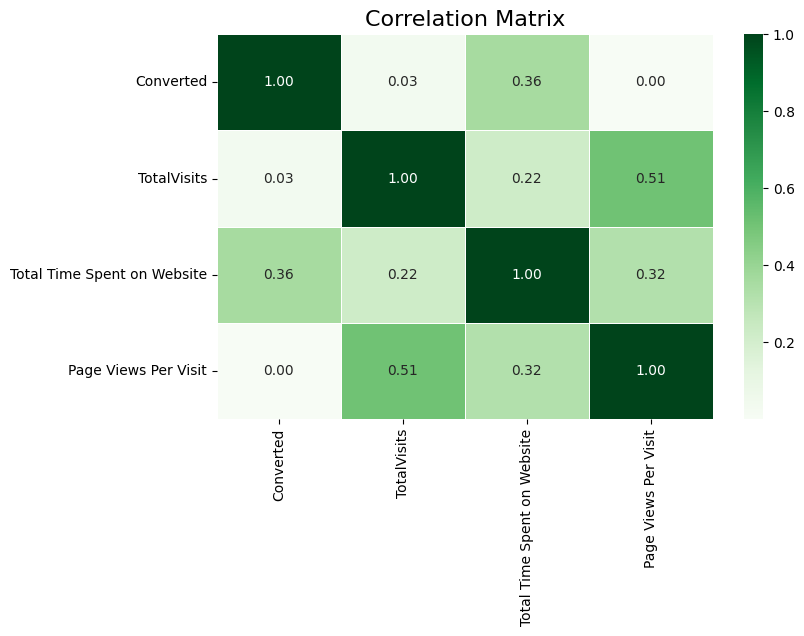

In [55]:
# Select numerical columns for the correlation matrix
numerical_columns = ['Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
correlation_matrix = lead_df[numerical_columns].corr()

# Plot the heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(
    correlation_matrix,
    annot=True,          # Display correlation coefficients
    cmap="Greens",       # Use the green color palette
    fmt=".2f",           # Format the numbers to 2 decimal places
    linewidths=0.5       # Add space between cells
)
plt.title("Correlation Matrix", fontsize=16)  # Add a title
plt.show()

So we can see that Total Time Spent on Website has moderate co-relation with the target variable Converted

### Data Preparation 

Dummy Variable Creation

In [56]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 non-n

In [57]:
# Check the columns in the dataframe that are of object type
object_columns = lead_df.loc[:, lead_df.dtypes == 'object']
object_columns.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [58]:
# Create dummy variables for the above columns
dummy = pd.get_dummies(lead_df[['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True).astype(int)

# Add the results to the master dataframe
lead_df = pd.concat([lead_df, dummy], axis=1)

In [59]:
# Drop the variables for which the dummy variables have been created

lead_df = lead_df.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity'], axis=1)

In [60]:
# Check the dataset post dummy variable creation

lead_df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Lead Source_blog,Lead Source_click2call,Lead Source_direct traffic,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [61]:
# check the datatypes and other details again
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 96 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Converted                                                                9074 non-null   int64  
 1   TotalVisits                                                              9074 non-null   float64
 2   Total Time Spent on Website                                              9074 non-null   int64  
 3   Page Views Per Visit                                                     9074 non-null   float64
 4   Lead Origin_landing page submission                                      9074 non-null   int64  
 5   Lead Origin_lead add form                                                9074 non-null   int64  
 6   Lead Origin_lead import                                                  9074

### Test-Train Data Split

In [62]:
# import required library
from sklearn.model_selection import train_test_split

In [63]:
# Put all the feature variables in X

X = lead_df.drop(['Converted'], axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Lead Source_blog,Lead Source_click2call,Lead Source_direct traffic,Lead Source_facebook,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [64]:
# Put the target variable in y

y = lead_df['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [65]:
# Split the dataset into 70% and 30% for train and test respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=10)

### Scaling

In [66]:
# Import MinMax scaler
from sklearn.preprocessing import MinMaxScaler
# Scale the three numeric features
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Lead Source_blog,Lead Source_click2call,Lead Source_direct traffic,Lead Source_facebook,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
1289,0.014184,0.612676,0.083333,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3604,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5584,0.042553,0.751761,0.250000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7679,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7563,0.014184,0.787852,0.083333,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


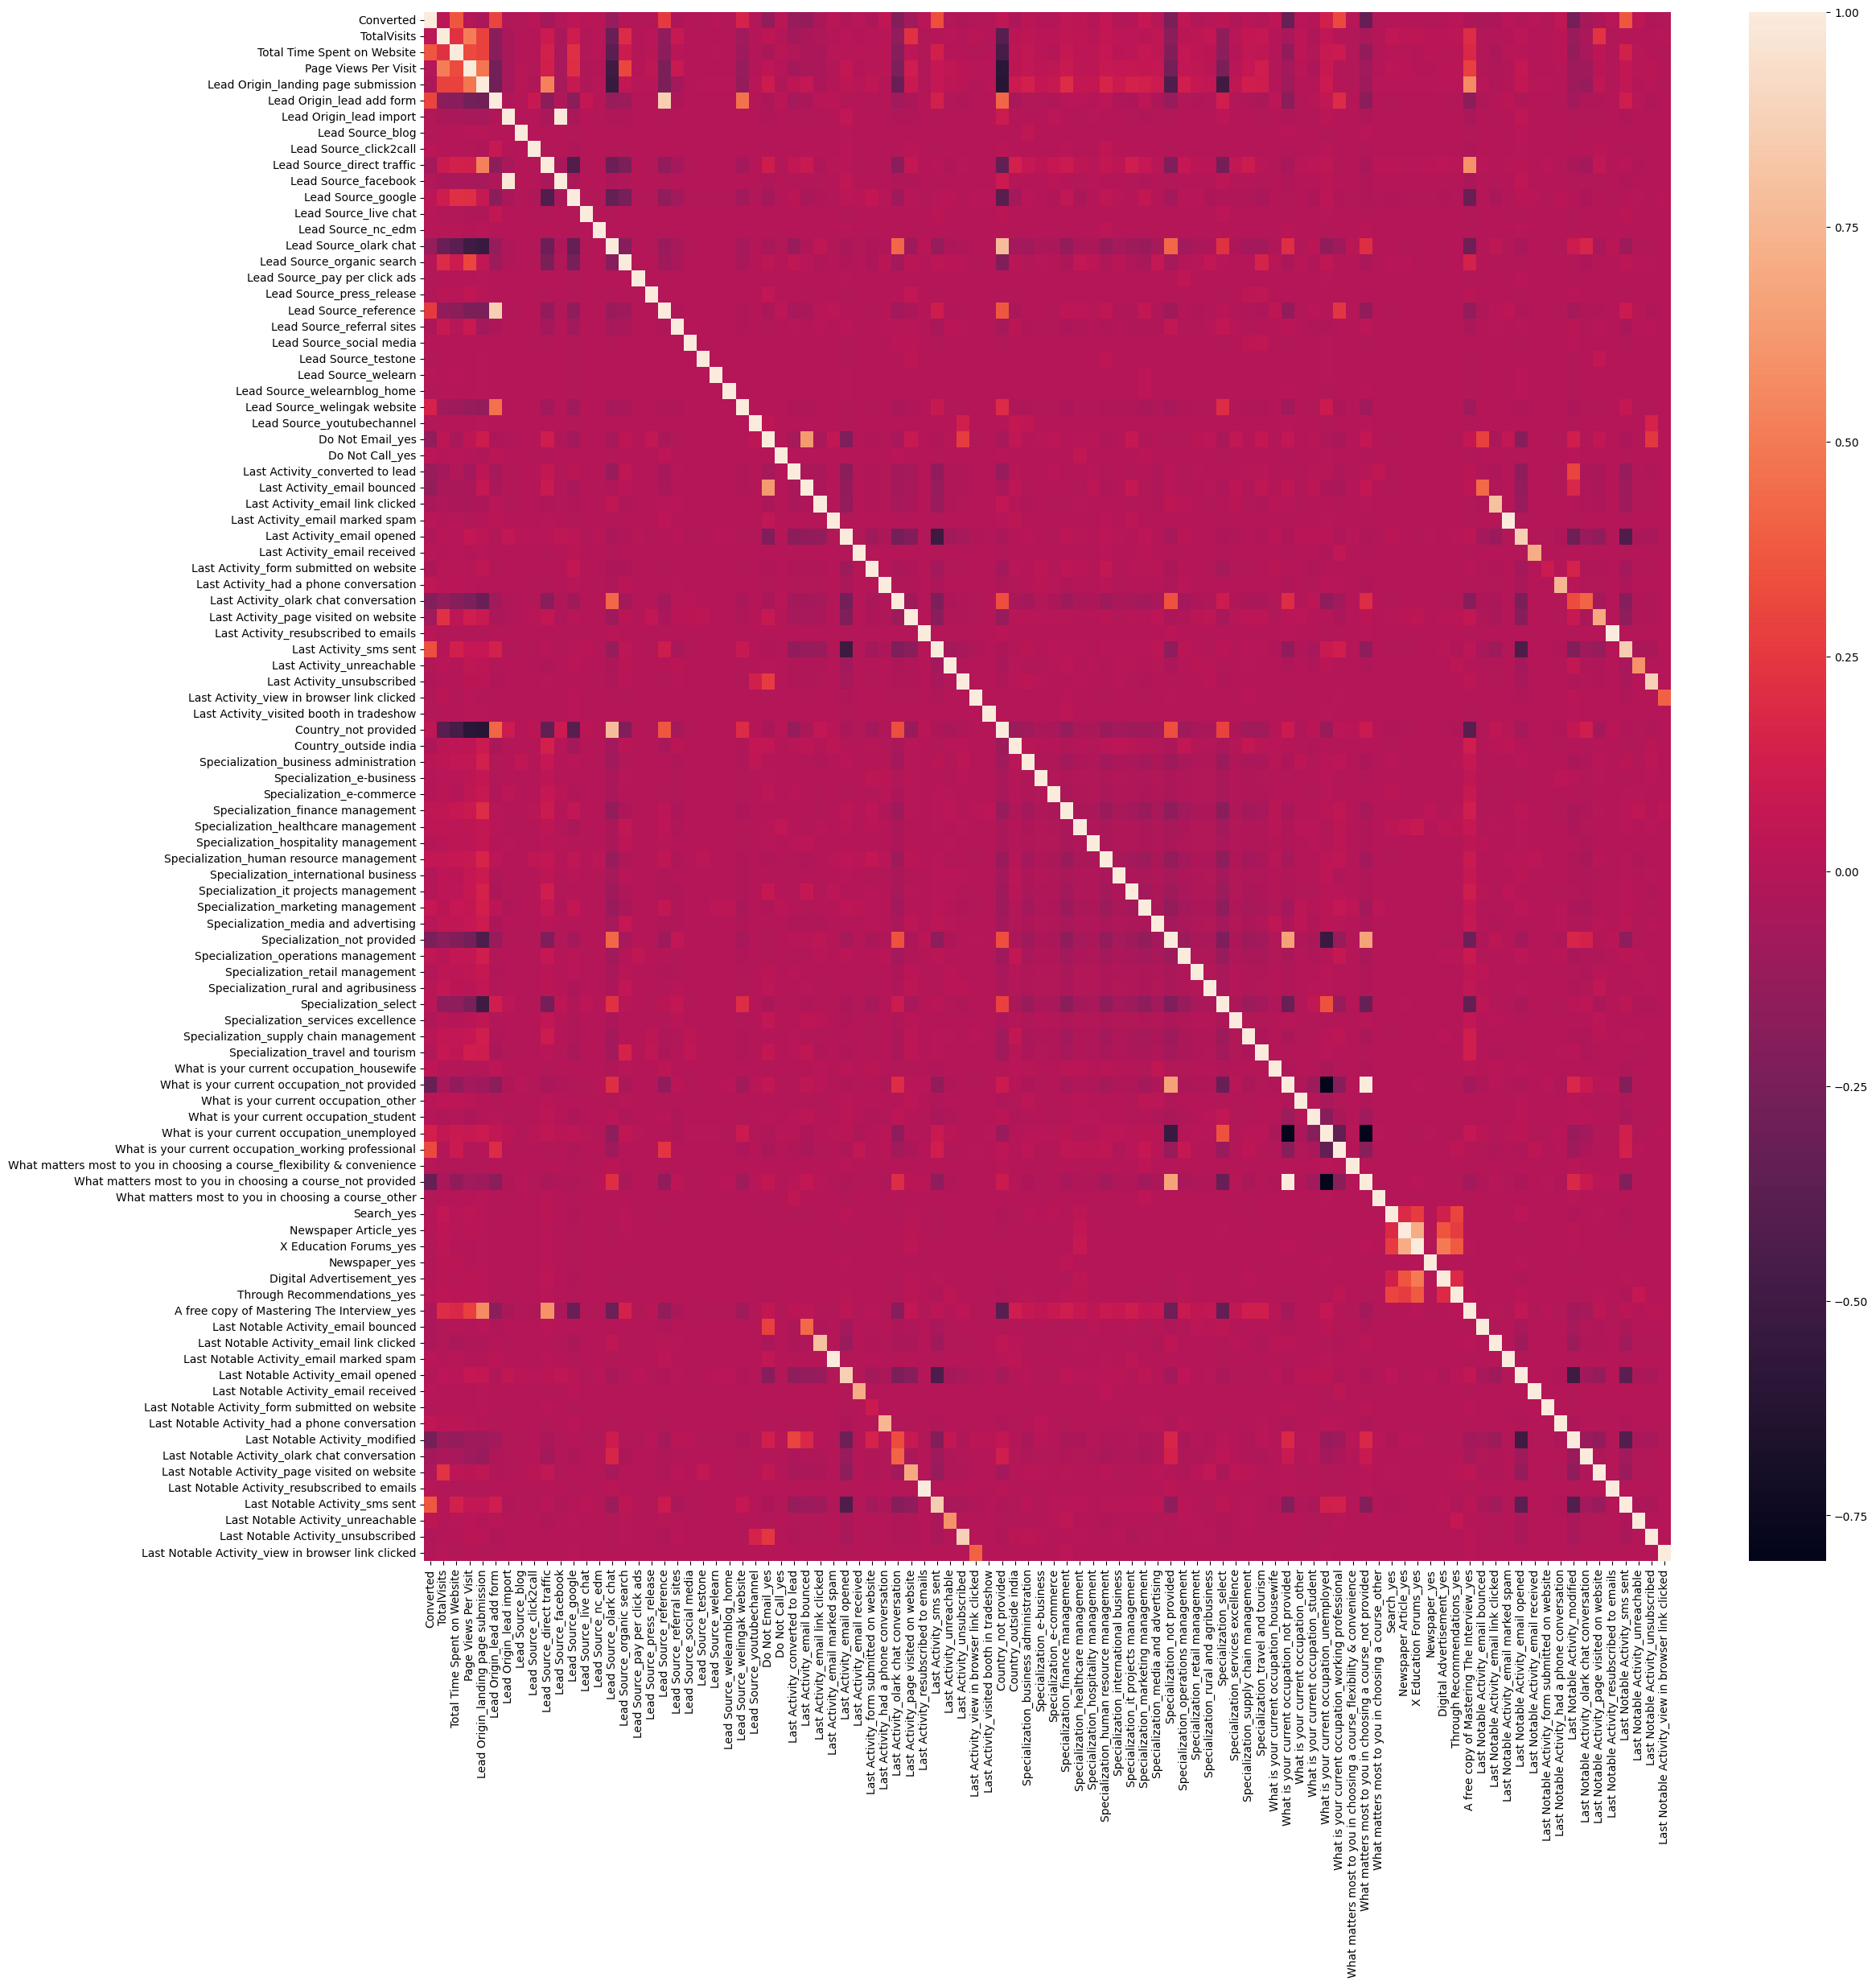

In [67]:
# Looking at the correlation table
plt.figure(figsize = (25,25))
sns.heatmap(lead_df.corr())
plt.show()

### 3. Model Building

In [68]:
# Import necessary libraries
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression


In [69]:

# Define the logistic regression model
logreg = LogisticRegression()

# Run RFE with 15 variables as output
rfe = RFE(logreg, n_features_to_select=15)         
rfe = rfe.fit(X_train, y_train)

In [70]:
# Let's take a look at which features have been selected by RFE

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', np.True_, np.int64(1)),
 ('Total Time Spent on Website', np.True_, np.int64(1)),
 ('Page Views Per Visit', np.False_, np.int64(8)),
 ('Lead Origin_landing page submission', np.True_, np.int64(1)),
 ('Lead Origin_lead add form', np.True_, np.int64(1)),
 ('Lead Origin_lead import', np.False_, np.int64(36)),
 ('Lead Source_blog', np.False_, np.int64(43)),
 ('Lead Source_click2call', np.False_, np.int64(74)),
 ('Lead Source_direct traffic', np.False_, np.int64(29)),
 ('Lead Source_facebook', np.False_, np.int64(10)),
 ('Lead Source_google', np.False_, np.int64(46)),
 ('Lead Source_live chat', np.False_, np.int64(52)),
 ('Lead Source_nc_edm', np.False_, np.int64(79)),
 ('Lead Source_olark chat', np.False_, np.int64(47)),
 ('Lead Source_organic search', np.False_, np.int64(45)),
 ('Lead Source_pay per click ads', np.False_, np.int64(80)),
 ('Lead Source_press_release', np.False_, np.int64(60)),
 ('Lead Source_reference', np.False_, np.int64(59)),
 ('Lead Source_referral site

In [71]:
# selecting the selected variable via RFE in col list

col = X_train.columns[rfe.support_]

In [72]:
col

Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_landing page submission', 'Lead Origin_lead add form',
       'Lead Source_welingak website', 'Do Not Email_yes',
       'Last Activity_olark chat conversation', 'Last Activity_sms sent',
       'Country_not provided', 'Specialization_not provided',
       'Specialization_select', 'What is your current occupation_housewife',
       'What is your current occupation_working professional',
       'What matters most to you in choosing a course_not provided',
       'Last Notable Activity_had a phone conversation'],
      dtype='object')

In [73]:
# checking which columns has been rejected

X_train.columns[~rfe.support_]

Index(['Page Views Per Visit', 'Lead Origin_lead import', 'Lead Source_blog',
       'Lead Source_click2call', 'Lead Source_direct traffic',
       'Lead Source_facebook', 'Lead Source_google', 'Lead Source_live chat',
       'Lead Source_nc_edm', 'Lead Source_olark chat',
       'Lead Source_organic search', 'Lead Source_pay per click ads',
       'Lead Source_press_release', 'Lead Source_reference',
       'Lead Source_referral sites', 'Lead Source_social media',
       'Lead Source_testone', 'Lead Source_welearn',
       'Lead Source_welearnblog_home', 'Lead Source_youtubechannel',
       'Do Not Call_yes', 'Last Activity_converted to lead',
       'Last Activity_email bounced', 'Last Activity_email link clicked',
       'Last Activity_email marked spam', 'Last Activity_email opened',
       'Last Activity_email received',
       'Last Activity_form submitted on website',
       'Last Activity_had a phone conversation',
       'Last Activity_page visited on website',
       'Last Ac

In [74]:
# Selecting columns selected by RFE
X_train = X_train[col]

In [75]:
# Importing 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [76]:
# Generic function to calculate VIF of variables

def calculateVIF(df):
    # Ensure only numeric columns are included
    df_numeric = df.select_dtypes(include=[float, int])
    
    # Handle missing values by dropping rows with NaNs (or you could impute them)
    df_numeric = df_numeric.dropna()
    
    vif = pd.DataFrame()
    vif['Features'] = df_numeric.columns
    vif['VIF'] = [variance_inflation_factor(df_numeric.values, i) for i in range(df_numeric.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by="VIF", ascending=False)
    return vif 

In [77]:
# dataframe with RFE selected variables

X_train_rfe = X_train[col]

In [78]:
# calculate VIF

calculateVIF(X_train_rfe)

,Features,VIF
9,Specialization_not provided,3.19
2,Lead Origin_landing page submission,2.86
13,What matters most to you in choosing a course_...,2.83
8,Country_not provided,2.78
1,Total Time Spent on Website,2.14
0,TotalVisits,2.13
3,Lead Origin_lead add form,1.91
10,Specialization_select,1.74
7,Last Activity_sms sent,1.56
6,Last Activity_olark chat conversation,1.45


VIF seems fine here

In [79]:
# Import statsmodels

import statsmodels.api as sm

In [80]:
# Building 1st logistic regression model

X_train_sm = sm.add_constant(X_train_rfe)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2593.3
Date:                Tue, 17 Dec 2024   Deviance:                       5186.5
Time:                        16:23:19   Pearson chi2:                 6.56e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.4042
Covariance Type:            nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
const                                                         -1.2725      0.139     -9.127      0.000      -1.546      -0.999
TotalVisits                                                    5.8880      1.511      3.897      0.000       2.927       8.849
Total Time Spent on Website                                    4.6280      0.169     27.312      0.000       4.296       4.960
Lead Origin_landing page submission                           -1.1421      0.126     -9.072      0.000      -1.389      -0.895
Lead Origin_lead add form                                      1.7269      0.234      7.379      0.000       1.268       2.186
Lead Source_welingak website                                   3.1096      1.035      3.004      0.003       1.081       5.139
Do Not Email_yes                                              -1.4099      0.174     -8.126      0.000      -1.750      -1.070
Last Activity_olark chat conversation                         -1.3925      0.170     -8.168      0.000      -1.727      -1.058
Last Activity_sms sent                                         1.2993      0.075     17.394      0.000       1.153       1.446
Country_not provided                                           1.4793      0.129     11.487      0.000       1.227       1.732
Specialization_not provided                                   -1.1108      0.190     -5.850      0.000      -1.483      -0.739
Specialization_select                                         -1.0610      0.132     -8.061      0.000      -1.319      -0.803
What is your current occupation_housewife                     24.2987   3.05e+04      0.001      0.999   -5.98e+04    5.99e+04
What is your current occupation_working professional           2.4351      0.200     12.176      0.000       2.043       2.827
What matters most to you in choosing a course_not provided    -1.0828      0.115     -9.418      0.000      -1.308      -0.857
Last Notable Activity_had a phone conversation                24.0328   2.12e+04      0.001      0.999   -4.15e+04    4.15e+04
==============================================================================================================================
"""

As VIF value is high >0.05 for Last Notable Activity_had a phone conversation and What is your current occupation_housewife, dropping them

In [81]:
X_train_new = X_train_rfe.drop(['Last Notable Activity_had a phone conversation','What is your current occupation_housewife'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
9,Specialization_not provided,3.19
2,Lead Origin_landing page submission,2.86
12,What matters most to you in choosing a course_...,2.83
8,Country_not provided,2.78
1,Total Time Spent on Website,2.13
0,TotalVisits,2.12
3,Lead Origin_lead add form,1.91
10,Specialization_select,1.74
7,Last Activity_sms sent,1.56
6,Last Activity_olark chat conversation,1.45


In [82]:
# Building 2nd logistic regression model

X_train_sm = sm.add_constant(X_train_new)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2606.1
Date:                Tue, 17 Dec 2024   Deviance:                       5212.2
Time:                        16:23:19   Pearson chi2:                 6.57e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4018
Covariance Type:            nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
const                                                         -1.2532      0.139     -9.017      0.000      -1.526      -0.981
TotalVisits                                                    5.9656      1.511      3.948      0.000       3.004       8.927
Total Time Spent on Website                                    4.6034      0.169     27.270      0.000       4.273       4.934
Lead Origin_landing page submission                           -1.1353      0.125     -9.048      0.000      -1.381      -0.889
Lead Origin_lead add form                                      1.7433      0.234      7.459      0.000       1.285       2.201
Lead Source_welingak website                                   3.0978      1.035      2.992      0.003       1.069       5.127
Do Not Email_yes                                              -1.4183      0.173     -8.184      0.000      -1.758      -1.079
Last Activity_olark chat conversation                         -1.3976      0.170     -8.202      0.000      -1.732      -1.064
Last Activity_sms sent                                         1.2857      0.075     17.251      0.000       1.140       1.432
Country_not provided                                           1.4686      0.128     11.434      0.000       1.217       1.720
Specialization_not provided                                   -1.1019      0.190     -5.813      0.000      -1.473      -0.730
Specialization_select                                         -1.0676      0.131     -8.126      0.000      -1.325      -0.810
What is your current occupation_working professional           2.4192      0.200     12.111      0.000       2.028       2.811
What matters most to you in choosing a course_not provided    -1.0965      0.115     -9.555      0.000      -1.321      -0.872
==============================================================================================================================
"""

In [83]:
# As not provided values are coming up like Country_not provided and Specialization_not and Specialization_select provided, hence we can drop it
X_train_new = X_train_new.drop(['Specialization_select','Specialization_not provided','Country_not provided', 'What matters most to you in choosing a course_not provided'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,Lead Origin_landing page submission,2.29
0,TotalVisits,2.00
1,Total Time Spent on Website,1.99
3,Lead Origin_lead add form,1.46
7,Last Activity_sms sent,1.44
4,Lead Source_welingak website,1.31
8,What is your current occupation_working profes...,1.17
5,Do Not Email_yes,1.08
6,Last Activity_olark chat conversation,1.01


In [84]:
# Building 3rd logistic regression model

X_train_sm = sm.add_constant(X_train_new)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6341
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2810.6
Date:                Tue, 17 Dec 2024   Deviance:                       5621.2
Time:                        16:23:19   Pearson chi2:                 6.58e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3620
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.6795      0.070    -24.071      0.000      -1.816      -1.543
TotalVisits                                              2.6487      1.208      2.193      0.028       0.282       5.016
Total Time Spent on Website                              4.0584      0.148     27.347      0.000       3.767       4.349
Lead Origin_landing page submission                     -0.6791      0.075     -8.995      0.000      -0.827      -0.531
Lead Origin_lead add form                                3.1458      0.220     14.303      0.000       2.715       3.577
Lead Source_welingak website                             2.5687      1.032      2.488      0.013       0.545       4.592
Do Not Email_yes                                        -1.4325      0.165     -8.680      0.000      -1.756      -1.109
Last Activity_olark chat conversation                   -1.2964      0.164     -7.920      0.000      -1.617      -0.976
Last Activity_sms sent                                   1.2809      0.071     17.942      0.000       1.141       1.421
What is your current occupation_working professional     2.7884      0.192     14.494      0.000       2.411       3.166
========================================================================================================================
"""

Now, both the p-values and VIFs seem decent enough for all the variables. So let's go ahead and make predictions using this final set of features by fixing this model.

### 4. Creating Prediction

In [85]:
X_train_new.columns

Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_landing page submission', 'Lead Origin_lead add form',
       'Lead Source_welingak website', 'Do Not Email_yes',
       'Last Activity_olark chat conversation', 'Last Activity_sms sent',
       'What is your current occupation_working professional'],
      dtype='object')

In [86]:
# Use 'predict' to predict the probabilities on the train set

y_train_pred = res.predict(sm.add_constant(X_train_new))
y_train_pred[:10]

1289    0.541266
3604    0.157161
5584    0.348075
7679    0.157161
7563    0.364431
7978    0.816968
7780    0.123385
7863    0.982622
838     0.876259
708     0.223970
dtype: float64

In [87]:
# Reshaping it into an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.54126605, 0.15716107, 0.34807466, 0.15716107, 0.36443141,
       0.81696834, 0.12338484, 0.98262157, 0.87625896, 0.22397008])

In [88]:
# Create a new dataframe containing the actual conversion flag and the probabilities predicted by the model

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,1,0.541266
1,0,0.157161
2,0,0.348075
3,0,0.157161
4,0,0.364431


#### Creating new column 'Predicted' with 1 if Paid_Prob > 0.5 else 0

In [89]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,1,0.541266,1
1,0,0.157161,0
2,0,0.348075,0
3,0,0.157161,0
4,0,0.364431,0


### 4. Model Evaluation

In [90]:
from sklearn import metrics

# Confusion matrix (already computed)
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
print("Confusion Matrix:")
print(confusion)

# Extracting TP, TN, FP, FN
TP = confusion[1,1]  # True positives
TN = confusion[0,0]  # True negatives
FP = confusion[0,1]  # False positives
FN = confusion[1,0]  # False negatives

# Accuracy
accuracy = (TP + TN) / (TP + TN + FP + FN)
print("Accuracy:", accuracy)

# Sensitivity (Recall or True Positive Rate)
sensitivity = TP / (TP + FN)
print("Sensitivity (Recall):", sensitivity)

# Specificity (True Negative Rate)
specificity = TN / (TN + FP)
print("Specificity (True Negative Rate):", specificity)

Confusion Matrix:
[[3454  441]
 [ 866 1590]]
Accuracy: 0.7942056369075736
Sensitivity (Recall): 0.6473941368078175
Specificity (True Negative Rate): 0.8867779204107831


### Optimise Cut Off (ROC Curve)

In [91]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [92]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

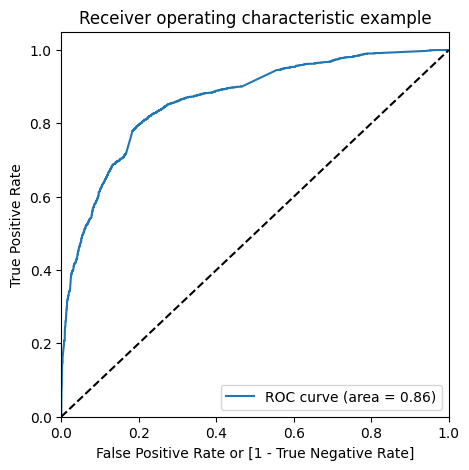

In [93]:
# Call the ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

#### The area under ROC curve is 0.86 which is a very good value.

In [94]:

# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.541266,1,1,1,1,1,1,1,0,0,0,0
1,0,0.157161,0,1,1,0,0,0,0,0,0,0,0
2,0,0.348075,0,1,1,1,1,0,0,0,0,0,0
3,0,0.157161,0,1,1,0,0,0,0,0,0,0,0
4,0,0.364431,0,1,1,1,1,0,0,0,0,0,0


In [95]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.386711,1.000000,0.000000
0.1,0.1,0.533617,0.981270,0.251348
0.2,0.2,0.727287,0.882329,0.629525
0.3,0.3,0.778303,0.839984,0.739409
0.4,0.4,0.801449,0.776466,0.817202
0.5,0.5,0.794206,0.647394,0.886778
0.6,0.6,0.782396,0.566775,0.918357
0.7,0.7,0.769485,0.485749,0.948395
0.8,0.8,0.748544,0.392101,0.973299
0.9,0.9,0.700205,0.239821,0.990501


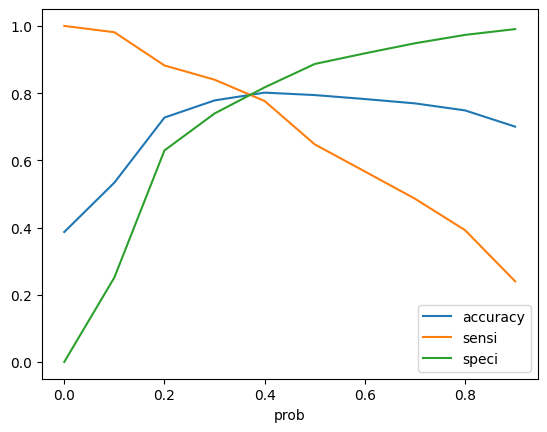

In [96]:
# Plotting ROC curve
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### As we can see from the above graph, the optimal cut off is around 0.35

In [97]:

y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()


,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.541266,1,1,1,1,1,1,1,0,0,0,0,1
1,0,0.157161,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.348075,0,1,1,1,1,0,0,0,0,0,0,0
3,0,0.157161,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.364431,0,1,1,1,1,0,0,0,0,0,0,1


In [98]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7929459927570461

In [99]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3045,  850],
       [ 465, 1991]])

In [100]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [101]:
# Calculating the sensitivity
print(TP/(TP+FN))

0.8106677524429967


In [102]:
# Calculating the specificity
print(TN/(TN+FP))

0.7817715019255456


#### With current cut off of 0.35, we have accuracy of around 79%

### 5. Making Predictions on Test Data 

In [103]:
# Scale the test set as well using just 'transform'

X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [104]:
# Substituting all the columns in the final train model
col = X_train.columns

# Select the columns in X_train for X_test as well
X_test = X_test[col]
X_test.head()

,TotalVisits,Total Time Spent on Website,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Source_welingak website,Do Not Email_yes,Last Activity_olark chat conversation,Last Activity_sms sent,Country_not provided,Specialization_not provided,Specialization_select,What is your current occupation_housewife,What is your current occupation_working professional,What matters most to you in choosing a course_not provided,Last Notable Activity_had a phone conversation
8308,0.035461,0.416813,1,0,0,0,0,0,0,0,0,0,0,0,0
7212,0.028369,0.001320,1,0,0,0,0,1,0,0,0,0,1,0,0
2085,0.000000,0.000000,0,1,1,0,0,0,1,0,1,0,0,0,0
4048,0.028369,0.617077,1,0,0,0,0,1,0,0,0,0,0,0,0
4790,0.028369,0.005282,1,0,0,0,0,0,0,0,0,0,0,0,0


In [105]:
# Add a constant to X_test

X_test_sm = sm.add_constant(X_test[col])

In [106]:
# Check X_test_sm

X_test_sm

,const,TotalVisits,Total Time Spent on Website,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Source_welingak website,Do Not Email_yes,Last Activity_olark chat conversation,Last Activity_sms sent,Country_not provided,Specialization_not provided,Specialization_select,What is your current occupation_housewife,What is your current occupation_working professional,What matters most to you in choosing a course_not provided,Last Notable Activity_had a phone conversation
8308,1.0,0.035461,0.416813,1,0,0,0,0,0,0,0,0,0,0,0,0
7212,1.0,0.028369,0.001320,1,0,0,0,0,1,0,0,0,0,1,0,0
2085,1.0,0.000000,0.000000,0,1,1,0,0,0,1,0,1,0,0,0,0
4048,1.0,0.028369,0.617077,1,0,0,0,0,1,0,0,0,0,0,0,0
4790,1.0,0.028369,0.005282,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3261,1.0,0.000000,0.000000,0,0,0,0,1,0,1,0,0,0,0,0,0
8179,1.0,0.170213,0.148768,1,0,0,0,0,1,0,0,0,0,0,1,0
6236,1.0,0.000000,0.000000,0,0,0,0,0,0,1,1,0,0,0,1,0
5240,1.0,0.078014,0.458627,1,0,0,0,0,1,0,0,0,0,0,0,0


In [107]:
# Keeping test set same as model
X_test = X_test[['TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_landing page submission', 'Lead Origin_lead add form',
       'Lead Source_welingak website', 'Do Not Email_yes',
       'Last Activity_olark chat conversation', 'Last Activity_sms sent',
       'What is your current occupation_working professional']]

In [108]:
X_test.columns

Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_landing page submission', 'Lead Origin_lead add form',
       'Lead Source_welingak website', 'Do Not Email_yes',
       'Last Activity_olark chat conversation', 'Last Activity_sms sent',
       'What is your current occupation_working professional'],
      dtype='object')

In [109]:
# Make predictions on the test set and store it in the variable 'y_test_pred'
X_test_with_const = sm.add_constant(X_test)
y_test_pred = res.predict(X_test_with_const)

In [110]:
y_test_pred[:10]

8308    0.360526
7212    0.857085
2085    0.982622
4048    0.817842
4790    0.094319
8552    0.791655
2232    0.152115
5259    0.157161
2399    0.539558
8018    0.048529
dtype: float64

In [111]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [112]:
# Let's see the head

y_pred_1.head()

,0
8308,0.360526
7212,0.857085
2085,0.982622
4048,0.817842
4790,0.094319


In [113]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

# Remove index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Append y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

# Check 'y_pred_final'
y_pred_final.head()

# Rename the column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [114]:
# Let's see the head of y_pred_final
y_pred_final.head()

# Make predictions on the test set using 0.35 as the cutoff
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)

In [115]:
# Check y_pred_final
y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,0,0.360526,1
1,1,0.857085,1
2,1,0.982622,1
3,1,0.817842,1
4,0,0.094319,0


#### Accuracy

In [116]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7969151670951157

In [117]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1366,  378],
       [ 175,  804]])

In [118]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

#### Sensitivity

In [119]:
# Calculate sensitivity
print(TP / float(TP+FN))

0.8212461695607763


#### Specificity

In [120]:
# Calculate specificity
print(TN / float(TN+FP))

0.783256880733945


### Precision-Recall View

In [121]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3454,  441],
       [ 866, 1590]])

### Precision
TP / TP + FP

In [122]:
print(confusion[1,1]/(confusion[0,1]+confusion[1,1]))

0.7828655834564254


### Recall
TP / TP + FN

In [123]:
print(confusion[1,1]/(confusion[1,0]+confusion[1,1]))

0.6473941368078175


### Precision Recall Trade-off

In [124]:
from sklearn.metrics import precision_recall_curve

In [125]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       1
 1       0
 2       0
 3       0
 4       0
        ..
 6346    0
 6347    0
 6348    0
 6349    0
 6350    1
 Name: Converted, Length: 6351, dtype: int64,
 0       1
 1       0
 2       0
 3       0
 4       0
        ..
 6346    0
 6347    0
 6348    0
 6349    0
 6350    0
 Name: Predicted, Length: 6351, dtype: int64)

In [126]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

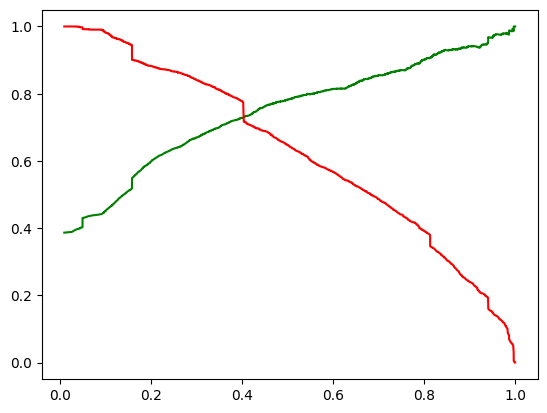

In [127]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [128]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.44 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.541266,1,1,1,1,1,1,1,0,0,0,0,1
1,0,0.157161,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.348075,0,1,1,1,1,0,0,0,0,0,0,0
3,0,0.157161,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.364431,0,1,1,1,1,0,0,0,0,0,0,0


### Accuracy

In [129]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7949929145016533

In [130]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3349,  546],
       [ 756, 1700]])

In [131]:
# Calculate Precision

print(TP/(TP+FP))

0.6802030456852792


In [132]:
# Calculate Recall

print(TP/(TP+FN))

0.8212461695607763
